In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

In [17]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Adding a channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,  # Rotate images up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally
    height_shift_range=0.1,  # Shift images vertically
    preprocessing_function=lambda x: np.expand_dims(
        cv2.GaussianBlur(x.squeeze(), (5, 5), 0), axis=-1)  # Apply Gaussian blur to each image
)

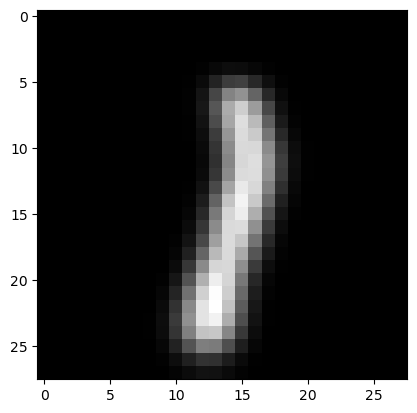

In [18]:
# Get an iterator for augmented images
augmented_images = datagen.flow(x_train, y_train, batch_size=32)

# Fetch one augmented image and label
augmented_image, label = next(augmented_images)

# Example: Display the first image in the batch
import matplotlib.pyplot as plt

plt.imshow(augmented_image[0].squeeze(), cmap='gray')

In [19]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.GaussianNoise(0.1, input_shape=(28, 28, 1)),  # Add Gaussian noise layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model using the data generator
history = model.fit(datagen.flow(x_train, y_train, batch_size=16),
                    epochs=10, 
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // 16)

Epoch 1/10


2024-04-26 12:48:20.732043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3750/3750 [==============================] - 34s 9ms/step - loss: 0.3071 - accuracy: 0.9028 - val_loss: 0.1772 - val_accuracy: 0.9485
Epoch 2/10
3750/3750 [==============================] - 37s 10ms/step - loss: 0.1343 - accuracy: 0.9579 - val_loss: 0.0966 - val_accuracy: 0.9726
Epoch 3/10
3750/3750 [==============================] - 35s 9ms/step - loss: 0.1051 - accuracy: 0.9679 - val_loss: 0.0846 - val_accuracy: 0.9791
Epoch 4/10
3750/3750 [==============================] - 35s 9ms/step - loss: 0.0902 - accuracy: 0.9726 - val_loss: 0.1122 - val_accuracy: 0.9729
Epoch 5/10
3750/3750 [==============================] - 35s 9ms/step - loss: 0.0804 - accuracy: 0.9757 - val_loss: 0.0810 - val_accuracy: 0.9807
Epoch 6/10
3750/3750 [==============================] - 517s 138ms/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 0.0852 - val_accuracy: 0.9805
Epoch 7/10
3750/3750 [==============================] - 35s 9ms/step - loss: 0.0705 - accuracy: 0.9783 - val_loss: 0.0772 - val_accuracy:

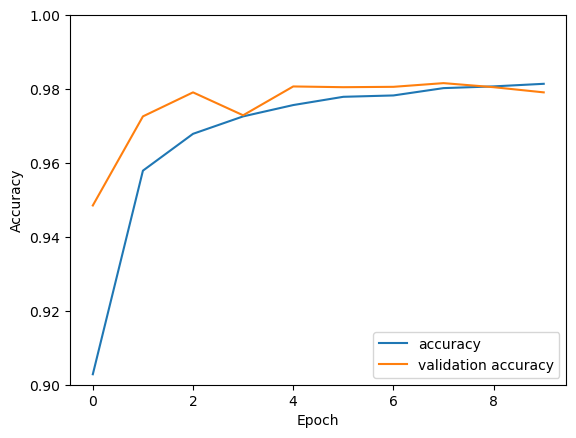

In [20]:

# noise_factor = 0.5
# x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
# x_train_noisy = tf.clip_by_value(x_train_noisy, 0., 1.)

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
#     tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
# ])

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

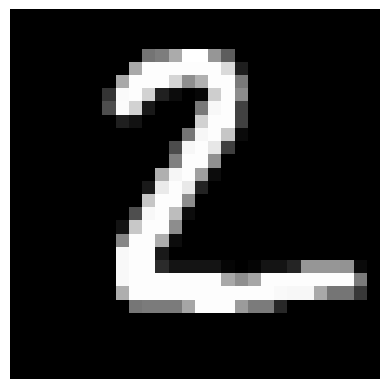

1/1 [==============================] - 0s 30ms/step
2


In [ ]:
import numpy as np
random_image = x_test[1]
fig, axarr = plt.subplots(1, 1)
axarr.imshow(random_image.reshape(28, 28), cmap="gray")
axarr.axis('off')
plt.show()

prediction = model.predict(tf.expand_dims(random_image, 0))
predicted_class = np.argmax(prediction)
print(predicted_class)
